# Tranfer Learnning to Flower Recognition using PyTorch 🔥
This dataset contains labeled 4242 images of flowers.


### Content
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.

For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they have different proportions!

## Data
You can download data from: [Flowers Recognition Dataset](https://www.kaggle.com/datasets/alxmamaev/flowers-recognition)

In [1]:
import numpy as np
import pandas as pd
import os
path="./"
os.listdir(path)

['.config', 'sample_data']

In [8]:
!pip install kaggle

In [4]:
path

'./flowers'

In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d alxmamaev/flowers-recognition

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
 89% 199M/225M [00:01<00:00, 172MB/s]
100% 225M/225M [00:01<00:00, 174MB/s]


In [11]:
!unzip flowers-recognition.zip -d ./flowers

Archive:  flowers-recognition.zip
  inflating: ./flowers/flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: ./flowers/flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: ./flowers/flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: ./flowers/flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: ./flowers/flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: ./flowers/flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: ./flowers/flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: ./flowers/flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: ./flowers/flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: ./flowers/flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: ./flowers/flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: ./flowers/flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: ./flowers/flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: ./flowers/flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: ./flowers/flowers/da

In [12]:
import os
print(os.getcwd())  # Te dirá en qué carpeta estás

/content


In [14]:
path="./flowers"
os.listdir(path)

['flowers']

In [17]:
path

'./flowers'

In [30]:
import os

print("Directorio actual:", os.getcwd())  # Ver en qué directorio estás
print("Contenido del directorio actual:", os.listdir())  # Ver qué hay en la raíz

# Buscar la carpeta "flowers" en todo el sistema
!find / -type d -name "flowers" 2>/dev/null

Directorio actual: /content
Contenido del directorio actual: ['.config', 'flowers', 'flowers-recognition.zip', 'sample_data']
/content/flowers
/content/flowers/flowers


In [35]:
path = "/content/flowers/flowers"


for root, dirs, files in os.walk(path):
    print(f"Carpeta: {root}")
    print(f"Archivos: {len(files)} encontrados")
    print("-" * 50)

📂 Carpeta: /content/flowers/flowers
📄 Archivos: 0 encontrados
--------------------------------------------------
📂 Carpeta: /content/flowers/flowers/sunflower
📄 Archivos: 733 encontrados
--------------------------------------------------
📂 Carpeta: /content/flowers/flowers/daisy
📄 Archivos: 764 encontrados
--------------------------------------------------
📂 Carpeta: /content/flowers/flowers/rose
📄 Archivos: 784 encontrados
--------------------------------------------------
📂 Carpeta: /content/flowers/flowers/tulip
📄 Archivos: 984 encontrados
--------------------------------------------------
📂 Carpeta: /content/flowers/flowers/dandelion
📄 Archivos: 1052 encontrados
--------------------------------------------------


In [36]:
path = "/content/flowers/flowers"

classes = ['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']

label_of_file = []
img_list = []

for kind in classes:
    kind_path = os.path.join(path, kind)

    if os.path.exists(kind_path):
        for img in os.listdir(kind_path):
            img_path = os.path.join(kind_path, img)


            if img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                img_list.append(img_path)
                label_of_file.append(kind)

df = pd.DataFrame({'img': img_list, 'label': label_of_file})

df = df.sample(frac=1).reset_index(drop=True)

df

,img,label
0,/content/flowers/flowers/rose/16476788181_0e2f...,rose
1,/content/flowers/flowers/daisy/8489463746_a983...,daisy
2,/content/flowers/flowers/dandelion/6983113346_...,dandelion
3,/content/flowers/flowers/daisy/1150395827_6f94...,daisy
4,/content/flowers/flowers/dandelion/34654530326...,dandelion
...,...,...
4312,/content/flowers/flowers/dandelion/5863928177_...,dandelion
4313,/content/flowers/flowers/tulip/19689681344_b05...,tulip
4314,/content/flowers/flowers/rose/5835539224_75967...,rose
4315,/content/flowers/flowers/sunflower/19756232959...,sunflower


In [37]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['encode_label'] = encoder.fit_transform(df['label'])

In [38]:
df.head(10)

,img,label,encode_label
0,/content/flowers/flowers/rose/16476788181_0e2f...,rose,2
1,/content/flowers/flowers/daisy/8489463746_a983...,daisy,0
2,/content/flowers/flowers/dandelion/6983113346_...,dandelion,1
3,/content/flowers/flowers/daisy/1150395827_6f94...,daisy,0
4,/content/flowers/flowers/dandelion/34654530326...,dandelion,1
5,/content/flowers/flowers/dandelion/16237158409...,dandelion,1
6,/content/flowers/flowers/daisy/4222584034_8964...,daisy,0
7,/content/flowers/flowers/tulip/20701823522_43e...,tulip,4
8,/content/flowers/flowers/daisy/10300722094_28f...,daisy,0
9,/content/flowers/flowers/rose/14460517566_783d...,rose,2


In [41]:
!pip install opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 25.6 MB/s eta 0:00:00


In [42]:
import cv2
print("OpenCV instalado correctamente. Versión:", cv2.__version__)

OpenCV instalado correctamente. Versión: 4.11.0


In [43]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models

In [44]:
example_img = cv2.imread(df['img'][2])
example_img.shape

(240, 320, 3)

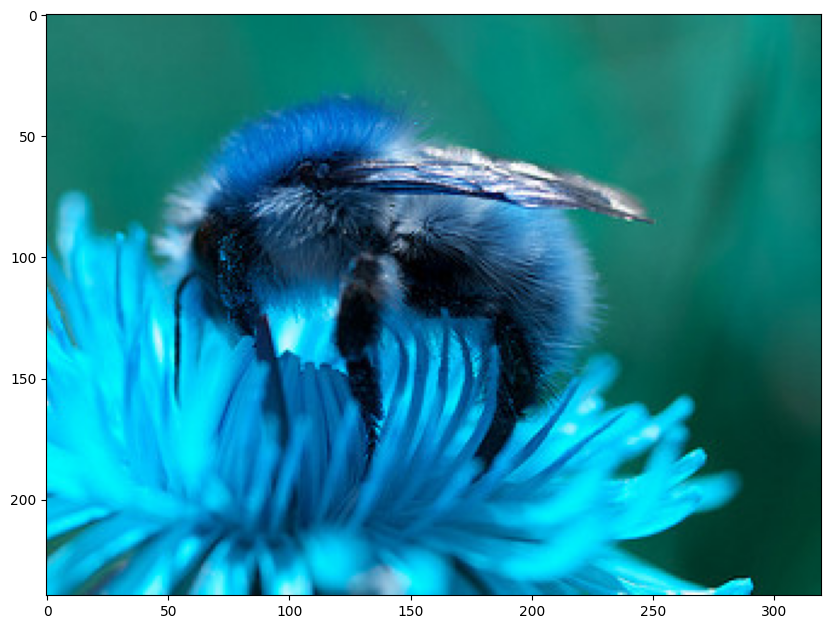

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(example_img)
plt.show()

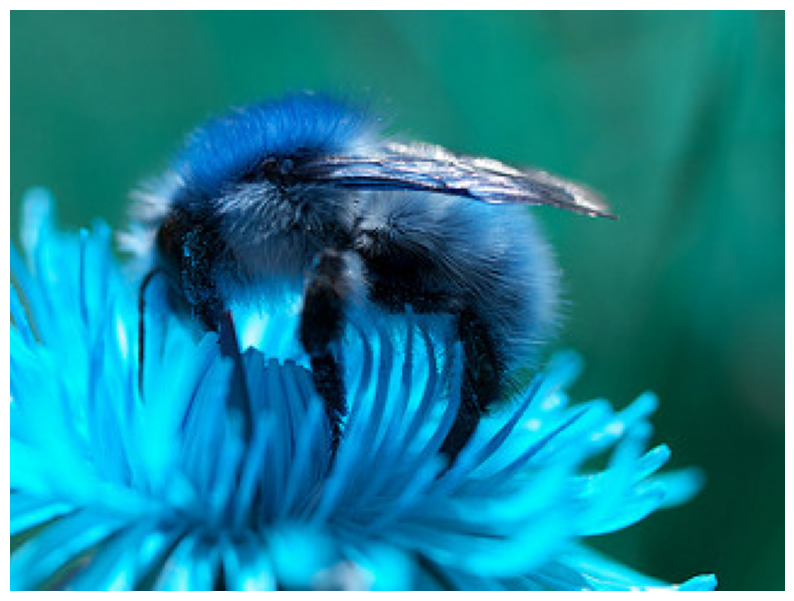

In [56]:
example_img_rgb = cv2.cvtColor(example_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(example_img_rgb)
plt.axis("off")
plt.show()

In [57]:
import cv2
import numpy as np

x = []
for img_path in df['img']:
    img = cv2.imread(img_path)

    if img is None:
        print(f"Error cargando la imagen: {img_path}")
        continue  # Salta esta imagen si no se pudo cargar

    img = cv2.resize(img, (150, 150))
    img = img / 255.0
    x.append(img)


x = np.array(x, dtype=np.float32)

## Modeling

In [58]:
import torch
from torch.utils.data import TensorDataset, DataLoader


X_tensor = torch.tensor(x).permute(0, 3, 1, 2)
y_tensor = torch.tensor(df['encode_label'].values, dtype=torch.long)

dataset = TensorDataset(X_tensor, y_tensor)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader, TensorDataset

model = models.resnet18(weights="IMAGENET1K_V1")
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 5)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

def train_model(model, dataloader, criterion, optimizer, num_epochs=25, device="cuda" if torch.cuda.is_available() else "cpu"):
    model.to(device)
    model.train()

    for epoch in range(num_epochs):
        running_loss = 0.0

        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)  # Mover a GPU/CPU

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(dataloader.dataset)
        print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f}")

    print("Entrenamiento finalizado ✅")

def test_model(model, dataloader, criterion, device="cuda" if torch.cuda.is_available() else "cpu"):
    model.to(device)
    model.eval()

    test_loss = 0.0
    correct = 0
    total_samples = len(dataloader.dataset)

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
            pred = outputs.argmax(dim=1)
            correct += (pred == labels).sum().item()

    test_loss /= total_samples
    test_accuracy = 100. * correct / total_samples

    print(f"Test set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{total_samples} ({test_accuracy:.2f}%)")

batch_size = 32
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)  # ⚠️ dataset debe estar definido antes

 print("🔍 Verificando disponibilidad de GPU:", torch.cuda.is_available())
train_model(model, train_loader, criterion, optimizer, num_epochs=25)

🔍 Verificando disponibilidad de GPU: False
Epoch 1/25 - Loss: 0.7110
Epoch 2/25 - Loss: 0.2925
Epoch 3/25 - Loss: 0.1543
Epoch 4/25 - Loss: 0.0937
Epoch 5/25 - Loss: 0.0660
Epoch 6/25 - Loss: 0.0421
Epoch 7/25 - Loss: 0.0317
Epoch 8/25 - Loss: 0.0231
Epoch 9/25 - Loss: 0.0167
Epoch 10/25 - Loss: 0.0129
Epoch 11/25 - Loss: 0.0135
Epoch 12/25 - Loss: 0.0121
Epoch 13/25 - Loss: 0.0104
Epoch 14/25 - Loss: 0.0075
Epoch 15/25 - Loss: 0.0066
Epoch 16/25 - Loss: 0.0076
Epoch 17/25 - Loss: 0.0074
Epoch 18/25 - Loss: 0.0080
Epoch 19/25 - Loss: 0.0054
